In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import sys, os, glob, time, warnings, gc

In [ ]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [2]:
gaia = Table.read('/global/homes/r/rongpu/temp/gaia_cutouts/gaia1_15_16.fits.gz')

In [3]:
print(len(gaia))
gaia[:3]

1000


SOURCE_ID,RA,RA_ERROR,DEC,DEC_ERROR,PARALLAX,PARALLAX_ERROR,PMRA,PMRA_ERROR,PMDEC,PMDEC_ERROR,ASTROMETRIC_EXCESS_NOISE,PHOT_G_MEAN_MAG,BP_RP,RADIAL_VELOCITY,RADIAL_VELOCITY_ERROR,PHOT_VARIABLE_FLAG,TEFF_VAL,A_G_VAL
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,str13,float32,float32
2746053586273293568,1.20040289165,0.0500350910352,8.00980931127,0.0395298077209,0.576277321172,0.0600753911004,0.511470579004,0.122283479779,-0.154955441995,0.0850104274227,0.0,15.9702,0.910141,nan,nan,NOT_AVAILABLE,5463.0,0.24
2540796141420101760,8.15431413616,0.0387534035646,-2.32177420801,0.0310208753894,0.601632305471,0.0413289861722,-0.61424839329,0.100898492354,-2.74593772512,0.0715541860073,0.0,15.1607,0.927712,nan,nan,NOT_AVAILABLE,5095.63,nan
2790715478011125760,18.928750522,0.0292009768705,21.8812874113,0.0274730882009,0.617733204607,0.0364122803004,6.84331212132,0.0623457218634,2.56831509533,0.0619051856654,0.0,15.1021,0.862141,nan,nan,NOT_AVAILABLE,5591.99,0.405


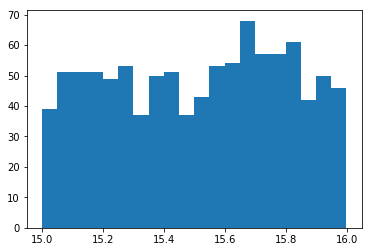

In [4]:
plt.hist(gaia['PHOT_G_MEAN_MAG'], 20);

In [16]:
index = 2
band = 'g'
img_type = 'resid'
pixscale = '0.262'

ra, dec = gaia['RA'][index], gaia['DEC'][index]

download_dir = '/global/homes/r/rongpu/temp/gaia_cutouts/'
file_path = os.path.join(download_dir, 'gaia_{}.fits'.format(index))

url = 'http://legacysurvey.org/viewer/cutout.fits?ra={:f}&dec={:f}&layer=dr8-{}&pixscale={}&bands={}'.format(ra, dec, img_type, pixscale, band)
cmd = 'wget -O '+file_path+' \"'+url+'\"'

print(cmd)
os.system(cmd)

wget -O /global/homes/r/rongpu/temp/gaia_cutouts/gaia_2.fits "http://legacysurvey.org/viewer/cutout.fits?ra=18.928751&dec=21.881287&layer=dr8-resid&pixscale=0.262&bands=g"


0

In [27]:
img_raw = fitsio.read(file_path)
img = img_raw / (float(pixscale)**2)

In [40]:
def plot_cutout(img, pixscale, vmin=-1, vmax=1, unit='arcsec'):
    if unit=='arcsec':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])
    elif unit=='arcmin':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/60.
    elif unit=='deg':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/3600.
    else:
        raise ValueError('unrecognized unit')
    fig, ax = plt.subplots(figsize=(8, 8))
    dens = ax.imshow(img, aspect='equal', 
               cmap='seismic', extent=extent, vmin=vmin, vmax=vmax)
    fig.colorbar(dens, fraction=0.046, pad=0.04)
    return ax

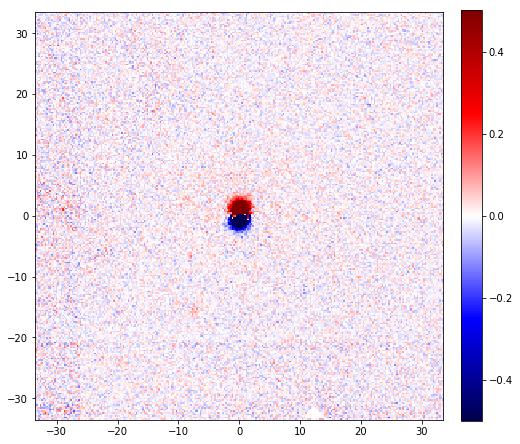

In [43]:
vrange = 0.5
plot_cutout(img, float(pixscale), vmin=-vrange, vmax=vrange)
plt.show()